In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = pd.read_csv("./data.csv")
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [40]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [41]:
features = pd.get_dummies(features)

features.iloc[:, 5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,True,False,False,False,False,False,False
1,45.7,44,41,50,44,61,False,False,True,False,False,False,False
2,45.8,41,43,46,47,56,False,False,False,True,False,False,False
3,45.9,40,44,48,46,53,False,True,False,False,False,False,False
4,46.0,44,46,46,46,41,False,False,False,False,False,True,False


In [42]:
labels = np.array(features["actual"])
print(labels)

[45 44 41 40 44 51 45 48 50 52 45 49 55 49 48 54 50 54 48 52 52 57 48 51
 54 56 57 56 52 48 47 46 51 49 49 53 49 51 57 62 56 55 58 55 56 57 53 51
 53 51 51 60 59 61 60 57 53 58 55 59 57 64 60 53 54 55 56 55 52 54 49 51
 53 58 63 61 55 56 57 53 54 57 59 51 56 64 68 73 71 63 69 60 57 68 77 76
 66 59 58 60 59 59 60 68 77 89 81 81 73 64 65 55 59 60 61 64 61 68 77 87
 74 60 68 77 82 63 67 75 81 77 82 65 57 60 71 64 63 66 59 66 65 66 66 65
 64 64 64 71 79 75 71 80 81 92 86 85 67 65 67 65 70 66 60 67 71 67 65 70
 76 73 75 68 69 71 78 85 79 74 73 76 76 71 68 69 76 68 74 71 74 74 77 75
 77 76 72 80 73 78 82 81 71 75 80 85 79 83 85 88 76 73 77 73 75 80 79 72
 72 73 72 76 80 87 90 83 84 81 79 75 70 67 68 68 68 67 72 74 77 70 74 75
 79 71 75 68 69 71 67 68 67 64 67 76 77 69 68 66 67 63 65 61 63 66 63 64
 68 57 60 62 66 60 60 62 60 60 61 58 62 59 62 62 61 65 58 60 65 68 59 57
 57 65 65 58 61 63 71 65 64 63 59 55 57 55 50 52 55 57 55 54 54 49 52 52
 53 48 52 52 52 46 50 49 46 40 42 40 41 36 44 44 43

In [43]:
features = features.drop("actual", axis=1)
features_list = list(features.columns)

features = np.array(features)
print(features.shape)

(348, 17)


In [44]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)
print("Training Feature Shape:", train_features.shape)
print("Training Label Shape:", train_labels.shape)
print("Test Feature Shape:", test_features.shape)
print("Test Label Shape:", test_labels.shape)

Training Feature Shape: (278, 17)
Training Label Shape: (278,)
Test Feature Shape: (70, 17)
Test Label Shape: (70,)


In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",1000
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsampl

In [46]:
predictions = rf.predict(test_features)

errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 3.89


In [47]:
mape = 100 * (errors / test_labels)

accuracy = 100 - np.mean(mape)
print("Accuracy: ", accuracy)

Accuracy:  93.846849325042


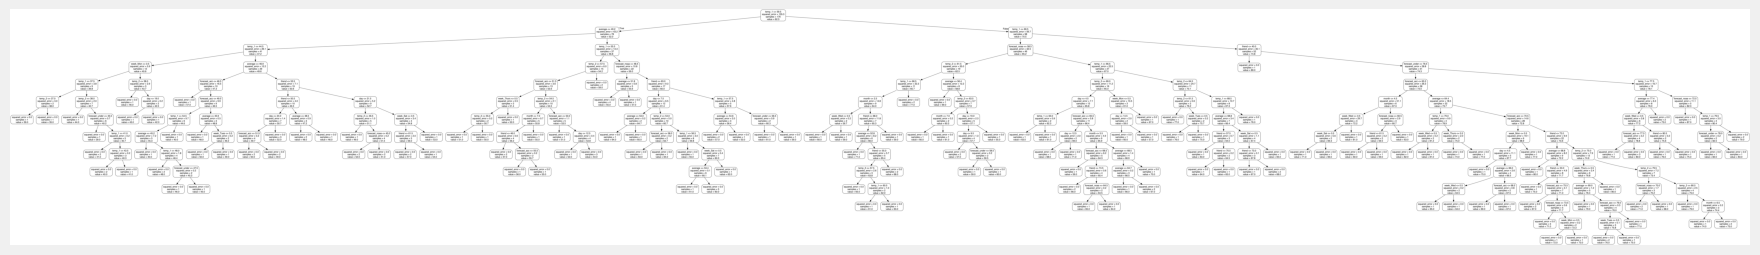

In [48]:
from sklearn.tree import export_graphviz
import pydot

tree = rf.estimators_[0]
export_graphviz(tree, out_file="tree.dot", feature_names=features_list, rounded=True, precision=1)
(graph, ) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
import matplotlib.image as mpimg
img = mpimg.imread('tree.png')
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Variable Importances')

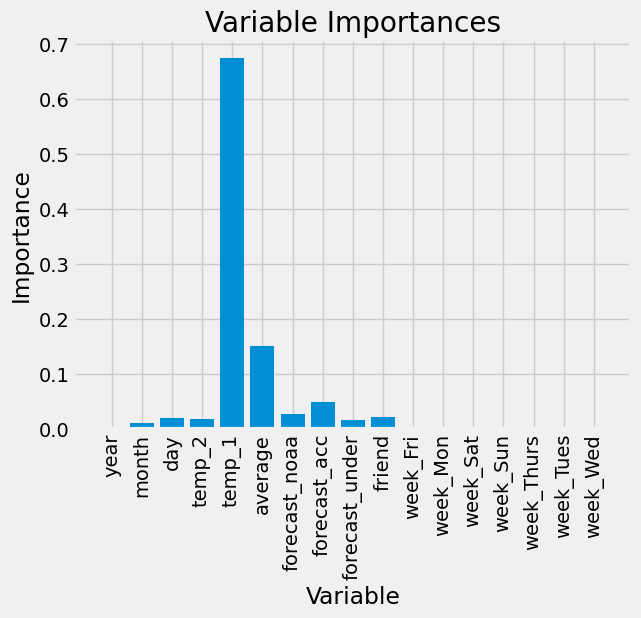

In [49]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, features_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')


In [50]:
# Check P-Values of Features
import statsmodels.api as sm

# Convert boolean columns to int and ensure all data is float
features_numeric = features.astype(float)

X = sm.add_constant(features_numeric)
model = sm.OLS(labels, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     108.4
Date:                Wed, 28 Jan 2026   Prob (F-statistic):          5.82e-118
Time:                        13:03:58   Log-Likelihood:                -1043.2
No. Observations:                 348   AIC:                             2118.
Df Residuals:                     332   BIC:                             2180.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.001      1.671      0.0

In [51]:
# Drop high P-Value Features
# Use integer indices for numpy array, e.g., [0, 3, 4, 7]
# Replace these indices with the correct ones for your features
selected_indices = [0, 3, 4, 7]  # Example indices, update as needed
new_features = features_numeric[:, selected_indices]
train_features, test_features, train_labels, test_labels = train_test_split(new_features, labels, test_size=0.2, random_state=42)
print("Training Feature Shape:", train_features.shape)
print("Training Label Shape:", train_labels.shape)
print("Test Feature Shape:", test_features.shape)
print("Test Label Shape:", test_labels.shape)

Training Feature Shape: (278, 4)
Training Label Shape: (278,)
Test Feature Shape: (70, 4)
Test Label Shape: (70,)


In [52]:
fine_tune_rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
fine_tune_rf.fit(train_features, train_labels)
fine_tune_predictions = fine_tune_rf.predict(test_features)
fine_tune_errors = abs(fine_tune_predictions - test_labels)
print('Mean Absolute Error after feature selection:', round(np.mean(fine_tune_errors), 2))
fine_tune_mape = 100 * (fine_tune_errors / test_labels)
fine_tune_accuracy = 100 - np.mean(fine_tune_mape)
print("Accuracy after feature selection: ", fine_tune_accuracy)

Mean Absolute Error after feature selection: 3.68
Accuracy after feature selection:  94.16380072254404


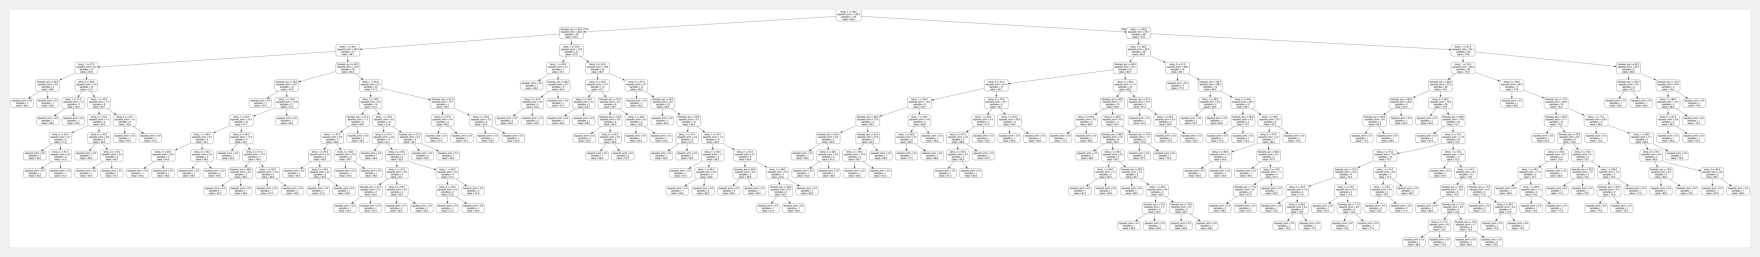

In [53]:
# Visualize new tree
fine_tree = fine_tune_rf.estimators_[0]
export_graphviz(fine_tree, out_file="fine_tree.dot", feature_names=[features_list[i] for i in selected_indices], rounded=True, precision=1)
(graph, ) = pydot.graph_from_dot_file("fine_tree.dot")
graph.write_png("fine_tree.png")
img = mpimg.imread('fine_tree.png')
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# Nhan xet MSE, ACC
print("After removing high P-Value features, the model's accuracy improved from {:.2f}% to {:.2f}%.".format(accuracy, fine_tune_accuracy))
print("After removing high P-Value features, the model's Mean Absolute Error changed from {:.2f} to {:.2f}.".format(np.mean(errors), np.mean(fine_tune_errors)))

After removing high P-Value features, the model's accuracy improved from 93.85% to 94.16%.
After removing high P-Value features, the model's Mean Absolute Error changed from 3.89 to 3.68.
